# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import json
import pprint
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

# Import API key
from api_keys import weather_api_key
#print(weather_api_key)
api_key = weather_api_key

print(api_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = ".../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

f1896ef9774eec1e5c2ba62805c4b461


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_count=len(cities)
city_count

639

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
params1 = {"appid": api_key, "units": units, "q": city }

In [4]:
#Test

city="Irvine"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
response1 = requests.get(query_url + city).json()
print(query_url + city)


response2 = requests.get(url, params=params1).json()
#print(response2.url)


name_test=response2["name"]
id_test= response2["id"]

print(json.dumps([response2], indent=2))

print("Id==========", id_test)

http://api.openweathermap.org/data/2.5/weather?appid=f1896ef9774eec1e5c2ba62805c4b461&units=metric&q=Irvine
[
  {
    "coord": {
      "lon": 16.85,
      "lat": 8.65
    },
    "weather": [
      {
        "id": 500,
        "main": "Rain",
        "description": "light rain",
        "icon": "10n"
      }
    ],
    "base": "stations",
    "main": {
      "temp": 25.73,
      "feels_like": 26.08,
      "temp_min": 25.73,
      "temp_max": 25.73,
      "pressure": 1008,
      "humidity": 66,
      "sea_level": 1008,
      "grnd_level": 965
    },
    "visibility": 10000,
    "wind": {
      "speed": 1.46,
      "deg": 192,
      "gust": 3.81
    },
    "rain": {
      "1h": 0.32
    },
    "clouds": {
      "all": 100
    },
    "dt": 1651106310,
    "sys": {
      "country": "TD",
      "sunrise": 1651120665,
      "sunset": 1651165334
    },
    "timezone": 3600,
    "id": 2433437,
    "name": "Doba",
    "cod": 200
  }
]
Id========== 2433437


In [5]:
#test 2
name_test=response2["name"]
id_test= response2["id"]
#print("Id==========", id_test)

 #Main main": {
#      "temp": 18.19,
#      "feels_like": 17.55,
#      "temp_min": 15.75,
#      "temp_max": 21.48,
#      "pressure": 1017,
#      "humidity": 57
lon_test = response2["coord"]["lon"]
lat_test = response2["coord"]["lat"]
print(lat_test)

temp = response2["main"]["temp_max"]
humidity_test = response2["main"]["humidity"]
cld_test = response2["clouds"]["all"]
print("cld", cld_test)
wind_speed = response2["wind"]["speed"]
country = response2 ["sys"]["country"]

date_test = response2["dt"]
print(date_test)

8.65
cld 100
1651106310


# Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
lat = []
lng = []
max_temp = []
cloudiness = []
wind_speed = []
country = []
date = []
humidity = []
city_name = []

In [7]:
# Loop through the list of cities and perform a request for data on each
#params = {"appid": api_key, "units": units, "q": city }
C=1
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        print( "Processing Record", C, "of", city_count, "City Name: ", city )
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        city_name.append(response["name"])
    except: 
        print("City not found. Skipping...")
    C=C+1
#print(lat)

Processing Record 1 of 639 City Name:  qaanaaq
Processing Record 2 of 639 City Name:  yirol
City not found. Skipping...
Processing Record 3 of 639 City Name:  bambous virieux
Processing Record 4 of 639 City Name:  provideniya
Processing Record 5 of 639 City Name:  hermanus
Processing Record 6 of 639 City Name:  taolanaro
City not found. Skipping...
Processing Record 7 of 639 City Name:  half moon bay
Processing Record 8 of 639 City Name:  kalmunai
Processing Record 9 of 639 City Name:  savannah bight
Processing Record 10 of 639 City Name:  mar del plata
Processing Record 11 of 639 City Name:  kampot
Processing Record 12 of 639 City Name:  ostrovnoy
Processing Record 13 of 639 City Name:  yellowknife
Processing Record 14 of 639 City Name:  katobu
Processing Record 15 of 639 City Name:  tuktoyaktuk
Processing Record 16 of 639 City Name:  punta arenas
Processing Record 17 of 639 City Name:  lagoa
Processing Record 18 of 639 City Name:  new norfolk
Processing Record 19 of 639 City Name:  s

Processing Record 160 of 639 City Name:  kudahuvadhoo
Processing Record 161 of 639 City Name:  vawkavysk
Processing Record 162 of 639 City Name:  kodiak
Processing Record 163 of 639 City Name:  maniitsoq
Processing Record 164 of 639 City Name:  vestmanna
Processing Record 165 of 639 City Name:  fevralsk
City not found. Skipping...
Processing Record 166 of 639 City Name:  tiarei
Processing Record 167 of 639 City Name:  kruisfontein
Processing Record 168 of 639 City Name:  khanpur
Processing Record 169 of 639 City Name:  abha
Processing Record 170 of 639 City Name:  chokurdakh
Processing Record 171 of 639 City Name:  koungou
Processing Record 172 of 639 City Name:  hamilton
Processing Record 173 of 639 City Name:  northam
Processing Record 174 of 639 City Name:  kapoeta
Processing Record 175 of 639 City Name:  iqaluit
Processing Record 176 of 639 City Name:  westport
Processing Record 177 of 639 City Name:  manga
Processing Record 178 of 639 City Name:  chuy
Processing Record 179 of 639 

Processing Record 318 of 639 City Name:  ranau
Processing Record 319 of 639 City Name:  cabedelo
Processing Record 320 of 639 City Name:  mwanza
Processing Record 321 of 639 City Name:  saldanha
Processing Record 322 of 639 City Name:  kathu
Processing Record 323 of 639 City Name:  ilulissat
Processing Record 324 of 639 City Name:  grand river south east
City not found. Skipping...
Processing Record 325 of 639 City Name:  douglas
Processing Record 326 of 639 City Name:  krasnaya gora
Processing Record 327 of 639 City Name:  kurush
Processing Record 328 of 639 City Name:  saint-georges
Processing Record 329 of 639 City Name:  great falls
Processing Record 330 of 639 City Name:  aripuana
Processing Record 331 of 639 City Name:  nizwa
Processing Record 332 of 639 City Name:  jaffna
Processing Record 333 of 639 City Name:  beringovskiy
Processing Record 334 of 639 City Name:  vagur
Processing Record 335 of 639 City Name:  sur
Processing Record 336 of 639 City Name:  caravelas
Processing Re

Processing Record 474 of 639 City Name:  san patricio
Processing Record 475 of 639 City Name:  denholm
Processing Record 476 of 639 City Name:  bernay
Processing Record 477 of 639 City Name:  male
Processing Record 478 of 639 City Name:  hvolsvollur
Processing Record 479 of 639 City Name:  boguchany
Processing Record 480 of 639 City Name:  datong
Processing Record 481 of 639 City Name:  port hardy
Processing Record 482 of 639 City Name:  laguna
Processing Record 483 of 639 City Name:  libreville
Processing Record 484 of 639 City Name:  san pedro
Processing Record 485 of 639 City Name:  marawi
Processing Record 486 of 639 City Name:  virginia beach
Processing Record 487 of 639 City Name:  alihe
Processing Record 488 of 639 City Name:  kazalinsk
City not found. Skipping...
Processing Record 489 of 639 City Name:  umm lajj
Processing Record 490 of 639 City Name:  nyurba
Processing Record 491 of 639 City Name:  yaan
Processing Record 492 of 639 City Name:  pyaozerskiy
Processing Record 493

Processing Record 633 of 639 City Name:  olafsvik
Processing Record 634 of 639 City Name:  grand forks
Processing Record 635 of 639 City Name:  coquimbo
Processing Record 636 of 639 City Name:  fatima
Processing Record 637 of 639 City Name:  eyl
Processing Record 638 of 639 City Name:  wynyard
Processing Record 639 of 639 City Name:  doba


In [8]:
print(len(city_name))
print(len(cities))
print(len(humidity))

592
639
592


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# creating a Data Frame
city_dic = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Max Temp": max_temp,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Humidity": humidity,
    "Lng": lng,
    "Lat": lat    
}
city_data = pd.DataFrame(city_dic)
city_data.drop_duplicates
city_data.dropna()
city_data.isnull().sum() 
city_data.count()


City          592
Country       592
Date          592
Max Temp      592
Cloudiness    592
Wind Speed    592
Humidity      592
Lng           592
Lat           592
dtype: int64

In [10]:
city_data.describe()

,Date,Max Temp,Cloudiness,Wind Speed,Humidity,Lng,Lat
count,5.920000e+02,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000
mean,1.651106e+09,16.193986,53.859797,3.450507,70.162162,20.745640,18.408715
std,1.143745e+02,10.885515,41.458465,2.494984,21.867097,88.527396,33.061173
min,1.651106e+09,-17.090000,0.000000,0.000000,1.000000,-175.200000,-54.800000
25%,1.651106e+09,8.135000,8.000000,1.540000,59.000000,-56.470500,-8.719150
50%,1.651106e+09,17.745000,61.000000,2.915000,76.000000,24.811400,18.709300
75%,1.651107e+09,25.435000,100.000000,4.685000,86.000000,99.868750,47.430175
max,1.651107e+09,33.320000,100.000000,14.450000,100.000000,179.316700,78.218600


In [11]:
city_data.tail()

,City,Country,Date,Max Temp,Cloudiness,Wind Speed,Humidity,Lng,Lat
587,Coquimbo,CL,1651106624,14.85,0,1.54,82,-71.3436,-29.9533
588,Fátima,PT,1651106625,11.60,49,1.80,92,-8.6524,39.6207
589,Eyl,SO,1651106625,27.29,33,2.67,80,49.8164,7.9803
590,Wynyard,AU,1651106626,18.08,91,4.57,84,145.7167,-41.0000
591,Doba,TD,1651106626,25.73,100,1.46,66,16.8500,8.6500


In [12]:
# Export the city data into a .csv
#city_data.to_csv(output_data_file, index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
#  Get the indices of cities that have humidity over 100%.

print(city_data['Humidity'].describe() ,"\n")

print("Max humidity is 100%. There are no cities that have humidity>100%")

count    592.000000
mean      70.162162
std       21.867097
min        1.000000
25%       59.000000
50%       76.000000
75%       86.000000
max      100.000000
Name: Humidity, dtype: float64 

Max humidity is 100%. There are no cities that have humidity>100%


In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

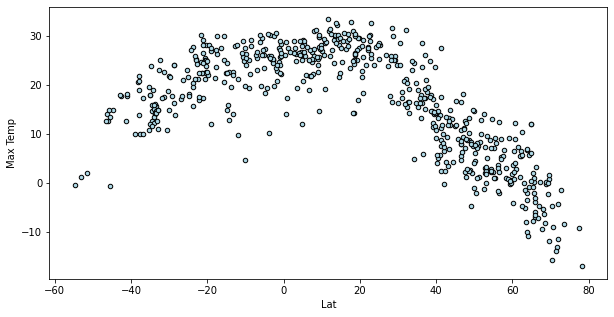

In [15]:
fig = city_data.plot.scatter(x='Lat', y='Max Temp', c='lightblue', figsize=(10,5), edgecolors='black')
plt.savefig('City Latitude vs. MaxTemp.png')

## Latitude vs. Humidity Plot

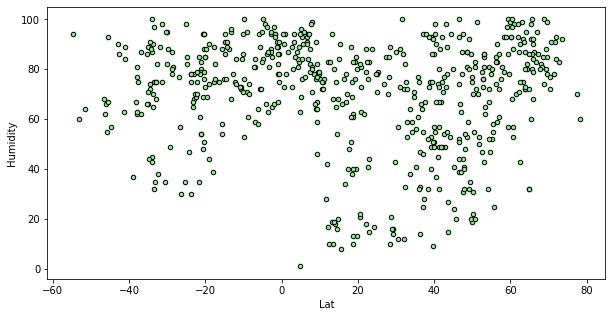

In [16]:
fig2 = city_data.plot.scatter(x='Lat', y='Humidity', c='lightgreen', figsize=(10,5), edgecolors='black')
plt.savefig('Latitude vs. Humidity.png')

## Latitude vs. Cloudiness Plot

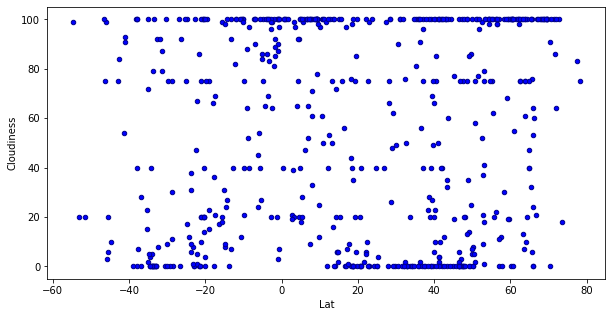

In [17]:
fig3 = city_data.plot.scatter(x='Lat', y='Cloudiness', c='blue', figsize=(10,5), edgecolors='darkblue')
plt.savefig('Latitude vs. Cloudiness.png')

## Latitude vs. Wind Speed Plot

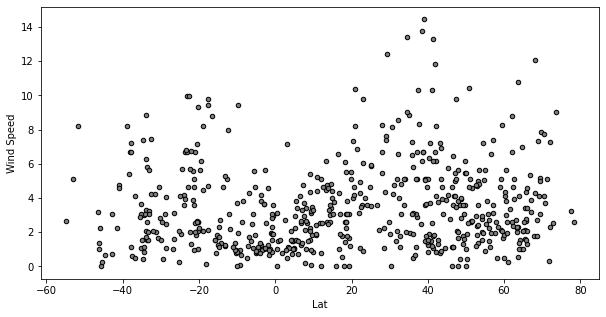

In [18]:
fig3 = city_data.plot.scatter(x='Lat', y='Wind Speed', c='gray', figsize=(10,5), edgecolors='black')
plt.savefig('Latitude vs. Wind Speed.png')

## Linear Regression

In [19]:
# New data frame for northern hemisphere
city_data_north = city_data[city_data['Lat'] >= 0]

#weather_data_north.count()

# New data frame for southern hemisphere
city_data_south = city_data[city_data['Lat'] < 0]

city_data_north.head()

,City,Country,Date,Max Temp,Cloudiness,Wind Speed,Humidity,Lng,Lat
0,Qaanaaq,GL,1651106311,-9.20,83,3.25,70,-69.3632,77.4840
2,Provideniya,RU,1651106312,-0.91,20,1.00,80,-173.3000,64.3833
4,Half Moon Bay,US,1651106313,18.45,0,10.29,67,-122.4286,37.4636
5,Kalmunai,LK,1651106314,26.69,9,2.93,82,81.8167,7.4167
6,Savannah Bight,HN,1651106314,27.32,56,6.60,76,-85.8500,16.4500


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

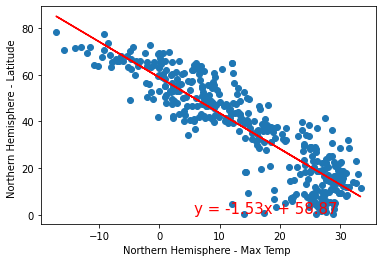

In [28]:
cdn_x_values = city_data_north['Max Temp']
cdn_y_values = city_data_north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(cdn_x_values, cdn_y_values)
regress_values = cdn_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(cdn_x_values,cdn_y_values)
plt.plot(cdn_x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere - Max Temp ')
plt.ylabel('Northern Hemisphere - Latitude  ')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

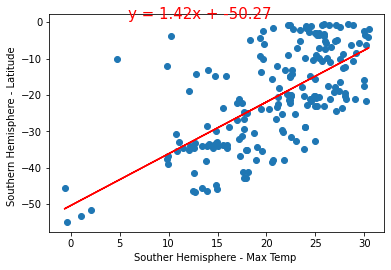

In [29]:
cds_x_values = city_data_south['Max Temp']
cds_y_values = city_data_south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(cds_x_values, cds_y_values)
regress_values = cds_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(cds_x_values,cds_y_values)
plt.plot(cds_x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Souther Hemisphere - Max Temp ')
plt.ylabel('Southern Hemisphere - Latitude  ')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

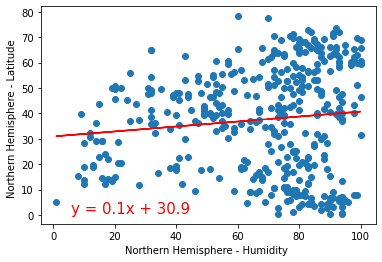

In [30]:
hln_x_values = city_data_north['Humidity']
hln_y_values = city_data_north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(hln_x_values, hln_y_values)
regress_values = hln_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(hln_x_values,hln_y_values)
plt.plot(hln_x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere - Humidity ')
plt.ylabel('Northern Hemisphere - Latitude  ')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

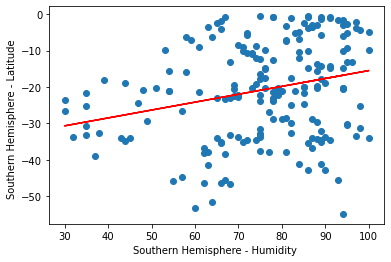

In [33]:
hls_x_values = city_data_south['Humidity']
hls_y_values = city_data_south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(hls_x_values, hls_y_values)
regress_values = hls_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(hls_x_values, hls_y_values)
plt.plot(hls_x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere - Humidity ')
plt.ylabel('Southern Hemisphere - Latitude  ')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

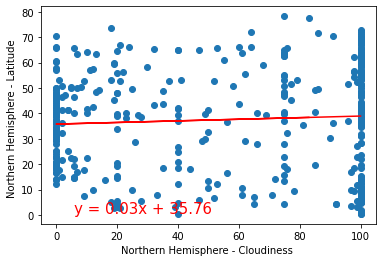

In [34]:
cln_x_values = city_data_north['Cloudiness']
cln_y_values = city_data_north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(cln_x_values, cln_y_values)
regress_values = cln_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(cln_x_values,cln_y_values)
plt.plot(cln_x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere - Cloudiness ')
plt.ylabel('Northern Hemisphere - Latitude  ')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

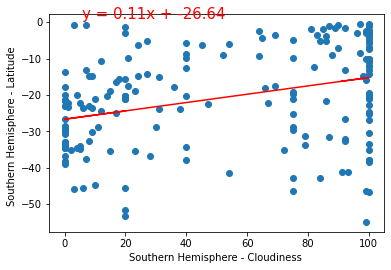

In [35]:
sln_x_values = city_data_south['Cloudiness']
sln_y_values = city_data_south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(sln_x_values, sln_y_values)
regress_values = sln_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sln_x_values, sln_y_values)
plt.plot(sln_x_values, regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere - Cloudiness ')
plt.ylabel('Southern Hemisphere - Latitude  ')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

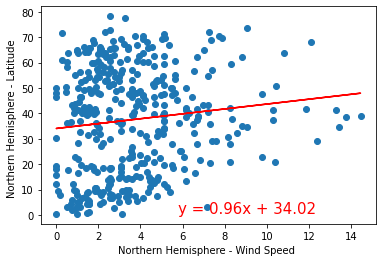

In [36]:
wln_x_values = city_data_north['Wind Speed']
wln_y_values = city_data_north['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(wln_x_values, wln_y_values)
regress_values = wln_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(wln_x_values, wln_y_values)
plt.plot(wln_x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere - Wind Speed ')
plt.ylabel('Northern Hemisphere - Latitude  ')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

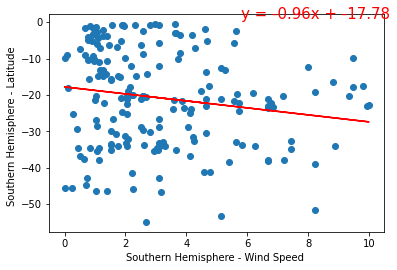

In [37]:
wls_x_values = city_data_south['Wind Speed']
wls_y_values = city_data_south['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(wls_x_values, wls_y_values)
regress_values = wls_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(wls_x_values, wls_y_values)
plt.plot(wls_x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere - Wind Speed ')
plt.ylabel('Southern Hemisphere - Latitude  ')
plt.show()